# Validación y Evaluación

Los algoritmos de aprendizaje automático aprenden un modelo de conocimiento a partir de datos históricos de un problema para llevar a cabo diferentes propósitos, fundamentalmente inferencia o predicción de una clase, pero también reducción de la dimensionalidad, imputación de valores ausentes, detección y corrección de outliers, agrupamiento de muestras o creación de reglas de asociación, entre muchos otros.

En los problemas de inferencia o predicción de una clase (siempre dentro del aprendizaje supervisado)los algoritmos deben crear un modelo de predicción a partir de un conjunto de datos que relacione los atributos de entrada con la clase de salida, modelo que permitirá posteriormente generar predicciones. 

Existe una gran variedad y tipos de algoritmos de aprendizaje supervisado para problemas de inferencia entre los cuales encontramos `regresión lineal múltiple` y `vecinos más cercanos` (para regresión); `regresión logística` y `árboles de decisión` (para clasificación).


## Conjunto de entrenamiento y conjunto de test

- Definimos como conjunto de entrenamiento (o simplemente entrenamiento, training en inglés) el conjunto de datos utilizado para que el algoritmo aprenda y genere su modelo de conocimiento. Una vez entrenado un algoritmo, el modelo debe probarse (para evaluar su bondad). 

- Definimos como conjunto de test (también conjunto de prueba o simplemente test, test en inglés) el conjunto de datos utilizado para que el algoritmo realice sus predicciones utilizando el modelo aprendido con el conjunto de entrenamiento. 

Una vez entrenado un algoritmo, el modelo debe probarse prediciendo la clase de otros ejemplos diferentes a los de entrenamiento. Es decir, el `conjunto de test` no debe contener ninguna instancia del `conjunto de entrenamiento`, sino que deben ser ejemplos diferentes. Este aspecto es fundamental para evaluar correctamente un aprendizaje. 

>Note: Aprender las cosas de memoria es un problema de aprendizaje que llamaremos `sobreajuste` (sobreajuste de un modelo a los datos, `overfitting` en inglés). De forma análoga, aprender un concepto demasiado general de los datos también es otro problema de aprendizaje: como el niño que aprende la lección de forma tan esquemática que no profundiza en ningún aspecto. Llamamos este problema `subajuste` (`underfitting` en inglés).

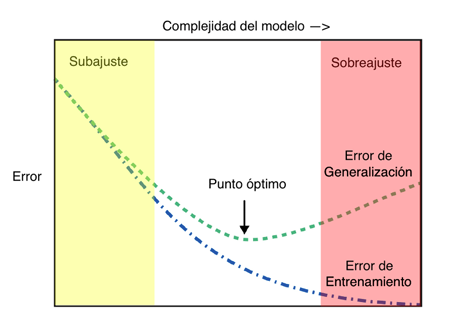

## Métricas

Para poder evaluar la bondad de las predicciones y cuantificar los errores producidos por los modelos, debemos definir las métricas (o medidas) de evaluación. Estas métricas son diferentes si el problema es de regresión o de clasificación.

### MAE (Mean Absolute Error)

La métrica que introducimos para regresión es el error absoluto medio (MAE, de mean absolute error en inglés) y se define según la siguiente ecuación:

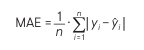

Donde `n` es el número de ejemplos del conjunto de test, y `R` es la clase del ejemplo i-ésimo e `yi` pertenece a `R` la predicción del modelo para dicho ejemplo. Nótese, por tanto, que la métrica `MAE`, para la evaluación de regresión, es una media aritmética de las diferencias en valor absoluto entre los valores reales y predichos.

El error absoluto, también conocido como pérdida `L1`, es un cálculo de error a nivel de fila donde se calcula la diferencia no negativa entre la predicción y lo real. `MAE` es la media agregada de estos errores, lo que nos ayuda a comprender el rendimiento del modelo en todo el conjunto de datos.

`MAE` es una métrica popular ya que el valor del error se interpreta fácilmente. Esto se debe a que el valor está en la misma escala que el objetivo que está prediciendo.

`MAE` es una medida de la precisión del modelo dada en la misma escala que el objetivo de predicción. **En pocas palabras, `MAE` puede interpretarse como el error promedio que tienen las predicciones del modelo en comparación con sus correspondientes objetivos reales.**


### Exactitud (Accuracy)

Es el porcentaje de aciertos con respecto al total de predicciones realizadas. En concreto, se define tal como se muestra en la siguiente ecuación:

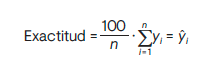

En la ecuación de la métrica de exactitud, asumimos que el operador de igualdad (=) devuelve 1 si los valores comparados coinciden, y 0 en caso contrario. Por consiguiente, la exactitud mide la tasa porcentual de predicciones acertadas con respecto al total, `n`, de predicciones realizadas.

## Validación 

Dado que necesitamos dos conjuntos de datos para evaluar los modelos, uno de entrenamiento y otro de
test, y que solo disponemos habitualmente de un único conjunto de datos para un problema, debemos crear
subconjuntos para entrenamiento y test a partir del conjunto original de datos.

Llamaremos `validación` (validation o resampling en inglés) al proceso mediante el cual se divide el conjunto de datos en subconjuntos de entrenamiento y test con el objetivo de evaluar de forma adecuada la bondad de los algoritmos de aprendizaje supervisado. En los siguientes apartados veremos diferentes estrategias para llevar a cabo este proceso de validación.

### Validación HoldOut

La primera forma de validación que estudiaremos será la `validación hold-out` (mantener fuera). En ella,
el conjunto de datos del problema se divide en dos partes: `entrenamiento` y `test`. Para definir esta división, se utiliza habitualmente un porcentaje que indica la proporción de muestras que se destinarán
al conjunto de entrenamiento, siendo el resto de las muestras las destinadas para el conjunto de test
(denominaremos este procedimiento como validación hold-out mediante split). Las proporciones más
habituales suelen ser `66%` y `34%` (entrenamiento-test), o bien `70%` y `30%`.

>Note: Este procedimiento es más recomendable si no hay dependencias de orden que respetar entre las muestras.

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Carga de datos
iris = datasets.load_iris()
print(iris.target_names)

In [ ]:
# Mostrar características de la tabla de datos.
print("Tabla de datos: %d instancias y %d atributos" % (iris.data.shape[0], iris.data.shape[1]))
print("Valores de la clase:", set(iris.target))

# Cuantificamos el número de instancias que contiene el dataset por clase
valores, ocurrencias = np.unique(iris.target, return_counts=True)
print(valores, ocurrencias)

In [ ]:
# Test: hold-out split 80-20%. # Partición externa
X_training, X_test, y_training, y_test = train_test_split(iris.data, 
                                                          iris.target, 
                                                          test_size=0.2, 
                                                          random_state=42) 

valores_test, ocur_test = np.unique(y_test, return_counts=True)

print('Test: ', 'clases:', valores_test, ' ocurrencias: ', ocur_test)

In [ ]:
# Estandarizar las características de entrenamiento y de test
standardizer = StandardScaler()
X_training = standardizer.fit_transform(X_training)
X_test = standardizer.transform(X_test)

### Partición interna

Tomamos el conjunto de `training` y realizamos por ejemplo un split `80/20`, donde el `20%` corresponde al conjunto de validación.

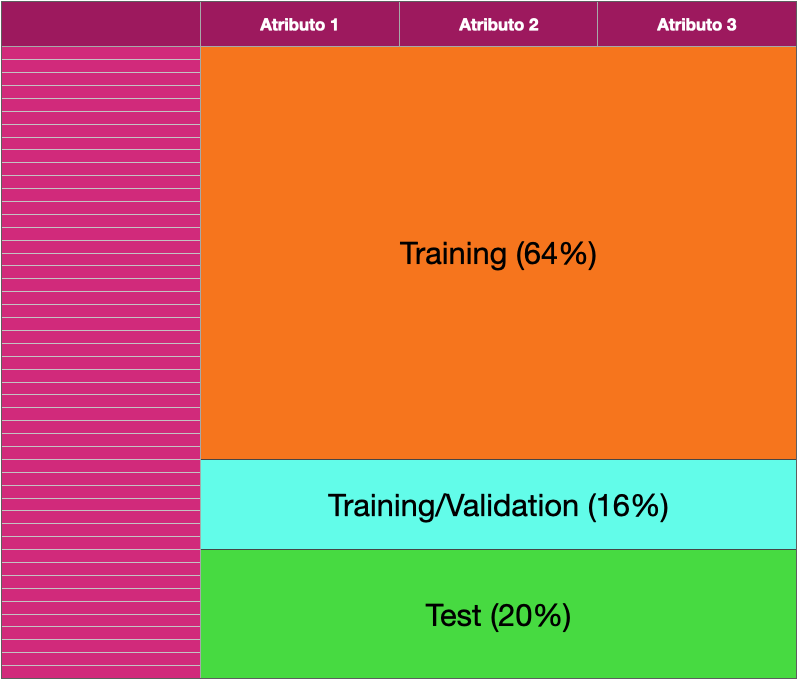

In [ ]:
# Validación: hold-out split 80-20%. # Partición interna
X_train, X_val, y_train, y_val = train_test_split(X_training, 
                                                  y_training, 
                                                  test_size=0.2, 
                                                  random_state=42)

valores_train, ocur_train = np.unique(y_train, return_counts=True)
print('Entrenamiento: ', ' clases:', valores_train, '  ocurrencias:', ocur_train)

valores_val, ocur_val = np.unique(y_val, return_counts=True)
print('Validation:    ', ' clases:', valores_val, '  ocurrencias:', ocur_val)

### DummyClassifier

Un `DummyClassifier` es exactamente lo que parece! Es un modelo clasificador que hace predicciones sin intentar encontrar patrones en los datos. Básicamente, el modelo predeterminado analiza qué etiqueta es más frecuente en el conjunto de datos de entrenamiento y hace predicciones basadas en esa etiqueta.

In [ ]:
# Construcción del objeto que contiene el algoritmo de aprendizaje.
# strategy='prior' - “prior”: the predict method always returns the most frequent class label 
# in the observed y argument passed to fit (like “most_frequent”)

clf = DummyClassifier(strategy='prior', random_state=42)

In [ ]:
# Entrenamiento del algoritmo de aprendizaje.
clf = clf.fit(X_train, y_train)

In [ ]:
# Evaluación del algoritmo de aprendizaje con el método "score" que devuelve directamente la métrica de 'accuracy'
val_accuracy = clf.score(X_val, y_val)
print("Exactitud en validación: ", val_accuracy)

In [ ]:
test_accuracy = clf.score(X_test, y_test)
print("Exactitud en test: ", test_accuracy)

In [ ]:
# Obtenemos las predicciones sobre conjunto de validación y de test - Como podemos observar mi clasificador siempre identifica la clase 2, por eso los errores.
y_pred_val = clf.predict(X_val)
print('Predicciones de validación ', y_pred_val)
print('Etiquetas reales validación', y_val)

y_pred_test = clf.predict(X_test)
print('\nPredicciones de test ', y_pred_test)
print('Etiquetas reales test', y_test)

### SVM

`SVM` ofrece una precisión muy alta en comparación con otros clasificadores, como la regresión logística y los árboles de decisión. Es conocido por su truco del núcleo para manejar espacios de entrada no lineales. Se utiliza en una variedad de aplicaciones como detección de rostros, detección de intrusiones, clasificación de correos electrónicos, artículos de noticias y páginas web, clasificación de genes y reconocimiento de escritura a mano.

Aplicamos un ejemplo con un clasificador más complejo que el `dummyclassifier` - `SVC` es la librería de SVM para clasificación

In [ ]:
from sklearn.svm import SVC
svc = SVC(C=0.1, gamma = 'auto') # Definimos algoritmo
svc.fit(X_train, y_train) # Entrenamos modelo

val_accuracy = svc.score(X_val, y_val) # Evaluamos modelo en validación
print('Exactitud en validación ', np.round(val_accuracy*100, 2), '%')

test_accuracy = svc.score(X_test, y_test) # Evaluamos modelo en test
print('Exactitud en test ', np.round(test_accuracy*100, 2), '%')

In [ ]:
# Guardar modelo
import pickle
with open('models/svc.pickle', 'wb') as fw:
    pickle.dump(svc, fw)

# Cargar modelo
with open('models/svc.pickle', 'rb') as fr:
    pickle.load(fr)